# Módulo 5: Aplicações e Contextualização de ULs (Unsupervised Learning)

## 1. Para que isso serve no contexto de dados?

Se não podemos prever um resultado exato, qual o valor disso para o negócio? A resposta está em três pilares principais:

### 1.1. Agrupamento (Clustering): "Quem se parece com quem?"

**Aplicação: Segmentação de Clientes.**
Descobrir que existem 3 tipos de compradores na sua loja:
*   Os que compram pouco mas sempre (fiéis)
*   Os que compram muito apenas no Natal (sazonais)
*   Os que só compram promoções (caçadores de oferta)

Com isso, você direciona o marketing certo para a pessoa certa.

**Algoritmos:** K-Means, DBSCAN, Hierarchical Clustering.

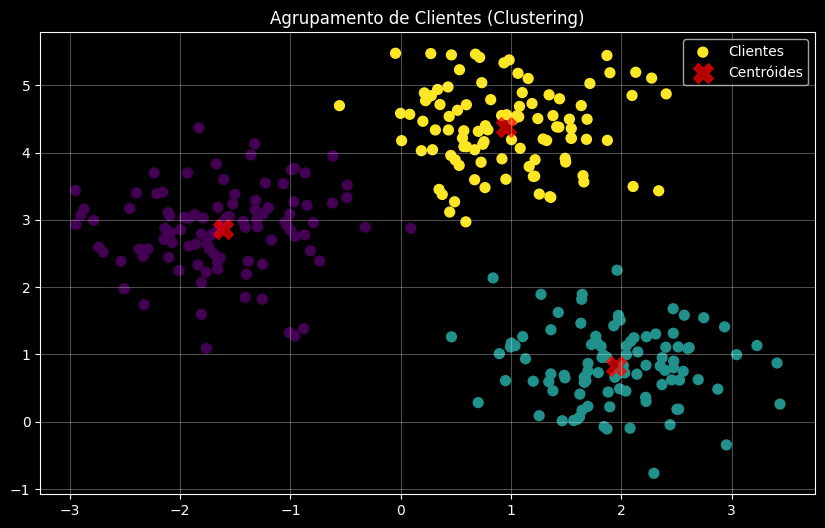

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Configuração Estética
plt.style.use('dark_background')

# Gerar dados simulados (Clientes)
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotar
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Clientes')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centróides')
plt.title('Agrupamento de Clientes (Clustering)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 1.2. Redução de Dimensionalidade: "Resumindo a informação."

**Aplicação: Visualização e Otimização.**
Imagine um dataset com 500 colunas (features). É impossível visualizar isso num gráfico. Técnicas de redução comprimem essas 500 colunas em 2 ou 3 "super-colunas" (componentes) que mantém a maior parte da informação original, permitindo plotar gráficos 2D/3D e acelerar o treinamento de outros modelos.

**Algoritmos:** PCA (Principal Component Analysis), t-SNE.

In [ ]:
from sklearn.decomposition import PCA

# Gerar dados com mais dimensões (ex: 5 variáveis)
rng = np.random.RandomState(1)
X_high_dim = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
# Expandindo artificialmente para 5D
X_high_dim = np.c_[X_high_dim, np.random.randn(200, 3)]

# Reduzindo para 2 Componentes Principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_high_dim)

# Plotar
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, c=X_pca[:, 0], cmap='plasma')
plt.title('Redução de Dimensionalidade (5D -> 2D via PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True, alpha=0.3)
plt.show()

### 1.3. Detecção de Anomalias (Outliers): "O que é estranho aqui?"

**Aplicação: Fraude Bancária ou Manutenção Preditiva.**
O modelo aprende o que é o comportamento "normal" dos dados. Qualquer coisa que se desvie muito desse padrão (uma transação de R$50.000 num cartão que não gasta R$50.000 normalmente) é marcada como suspeita.

**Algoritmos:** Isolation Forest, One-Class SVM.

In [ ]:
from sklearn.ensemble import IsolationForest

# Gerar dados normais e adicionar outliers
X_normal = 0.3 * np.random.randn(100, 2)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X_combined = np.r_[X_normal + 2, X_normal - 2, X_outliers]

# Detectar Anomalias
clf = IsolationForest(max_samples=100, random_state=42, contamination=0.1)
clf.fit(X_combined)
y_pred = clf.predict(X_combined)

# Plotar
plt.figure(figsize=(10, 6))
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_pred, cmap='coolwarm', s=50, edgecolors='k')
plt.title('Detecção de Anomalias (Isolation Forest)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()